# Optimising Retail Bank Strategies using RFM analysis customer based segmentation

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# This scripts reads the dataset
df = pd.read_csv('../bank_data_C (1).csv')
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1041610,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1041611,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1041612,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


## Data Cleaning

In [11]:
df.info() # checks information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


In [12]:
#This script changes the column data types
# Ensure all values in TransactionTime are 6 digits by padding with leading zeros
df['TransactionTime'] = df['TransactionTime'].astype(str).str.zfill(6)
# Convert TransactionTime to proper time format
df['TransactionTime'] = pd.to_datetime(df['TransactionTime'], format='%H%M%S', errors='coerce').dt.time # Convert TransactionTime from HHMMSS format to HH:MM:SS format
df['TransactionDate']= pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

In [13]:
# This scripts checks for missing values
Nan_values = df.isnull().sum()
Nan_values

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [14]:
#checks for duplicated values
duplicated_values = df.duplicated().sum()
duplicated_values

0

In [15]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5
...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0
1041610,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0
1041611,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0
1041612,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0


## Exploratory Data Analysis

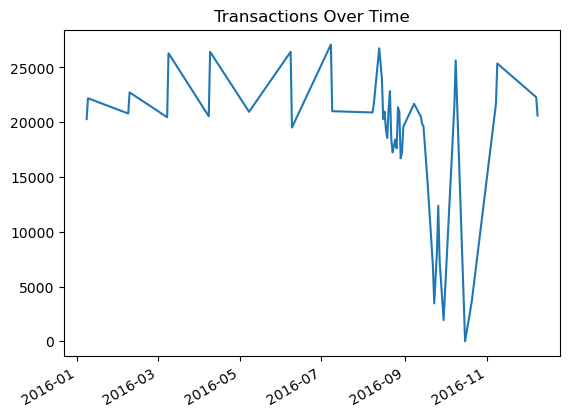

In [18]:
## Transcation trends analysis
df['TransactionDate'].value_counts().sort_index().plot()
plt.title('Transactions Over Time')
plt.show()

In [26]:
# filter dates where year is greater than 2025
invalid_dates = df[df['CustomerDOB'].dt.year > 2025]
invalid_dates

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,AgeGroup
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.00,-32,NaN
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.00,-49,NaN
5,T6,C1536588,2072-08-10,F,ITANAGAR,53609.20,2016-02-08,17:39:40,676.00,-48,NaN
15,T16,C8334633,2068-10-07,F,NEW DELHI,1283.12,2016-01-08,12:57:25,250.00,-44,NaN
29,T31,C7648712,2067-01-21,F,NEW DELHI,298461.05,2016-03-08,16:06:42,500.00,-42,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1041553,T1048507,C3333984,2070-09-20,M,NAVI MUMBAI,41.82,2016-09-18,18:23:10,878.18,-46,NaN
1041557,T1048511,C3429427,2048-07-15,M,HOWRAH,416244.74,2016-09-18,18:49:59,1695.00,-24,NaN
1041583,T1048537,C2939947,2033-05-10,M,NEW DELHI,92173.35,2016-09-18,18:45:56,1319.04,-9,NaN
1041591,T1048545,C3712582,2071-05-10,M,MUMBAI,25414.52,2016-09-18,18:20:15,400.00,-47,NaN


In [28]:
valid_dob = df[df['CustomerDOB'].dt.year <= 2025]['CustomerDOB']
median_dob = valid_dob.median()
df.loc[df['CustomerDOB'].dt.year > 2025, 'CustomerDOB'] = median_dob
median_dob

Timestamp('1988-02-06 00:00:00')

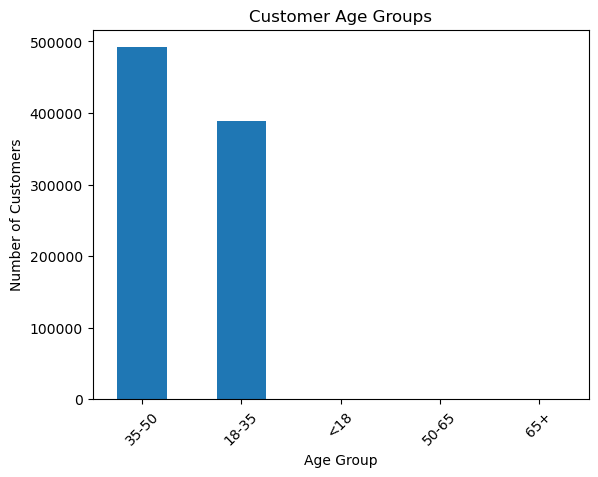

In [24]:
## calculating and grouping customers by age
df['Age'] = (pd.to_datetime('today') - df['CustomerDOB']).dt.days // 365
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['<18', '18-35', '35-50', '50-65', '65+'])
df['AgeGroup'].value_counts().plot(kind='bar')
plt.title('Customer Age Groups')
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()